## **Linear Regression Using Normal Equation**


#### **Import Necessary Libraries**


In [348]:
import numpy as np
import matplotlib.pyplot as plt

In [349]:
plt.style.use("seaborn-v0_8-darkgrid")

#### **Generate linear data with noise**


Define Variables 𝑋 and 𝑦


In [350]:
n_samples = 40
slope = 5
intercept = 2
noise_level = 3
np.random.seed(42)

X = np.linspace(0, 10, n_samples)

y_true = slope * X + intercept
y = y_true + np.random.normal(0, noise_level, n_samples)

#### **Plot the Original Data**


Visualize the data using a scatter plot of (X,y)


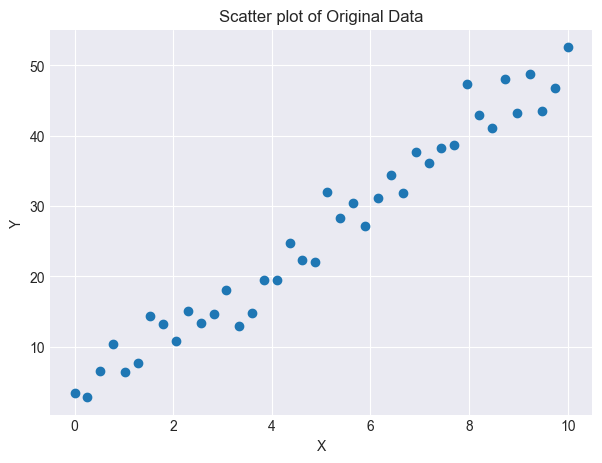

In [351]:
plt.figure(figsize=(7, 5))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter plot of Original Data")
plt.show()

#### **Adding a column of ones to X for the intercept term**

In [352]:
X = np.c_[np.ones((X.shape[0], 1)), X]

#### **Hypothesis Function**



$$h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n$$

$$h_\theta(x) = X \theta^T$$


In [353]:
def hypothesis(X, theta):
    return X @ theta.T

#### **Normal Equation Formula**



$$\theta = (X^T X)^{-1} X^T y$$


In [354]:
def normal_equation(X, y):
    X_T = X.T
    return np.linalg.inv(X_T @ X) @ X_T @ y

#### **Train Model**

In [355]:
theta_opt = normal_equation(X, y).ravel()
theta_opt

array([2.53818879, 4.76118014])

#### **Predict y values using the LR equation**


In [356]:
y_pred = hypothesis(X, theta_opt)

#### **Evaluate Model**


**Use R2 score to evaluate LR equation output**

https://en.wikipedia.org/wiki/Coefficient_of_determination


In [357]:
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [358]:
r2 = r2_score(y, y_pred)
print(f"R² Score: {r2}")

R² Score: 0.9637647687815765


#### **Visualize Results**


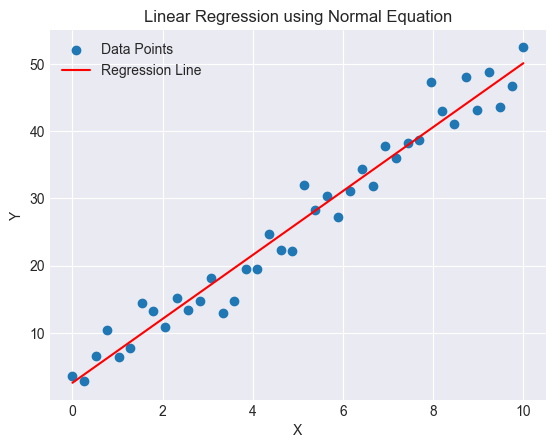

In [359]:
plt.scatter(X[:, 1], y, label="Data Points")
plt.plot(X[:, 1], y_pred, color="red", label="Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression using Normal Equation")
plt.legend()
plt.show()